## IMPORT LIBRARY

In [57]:
# import library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

## DATA LOADING

In [2]:
df = pd.read_csv('h8dsft_P1G3_irfan_fahmuddin.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


## EDA

In [3]:
# copy data
data = df.copy()

# tambah kolom untuk keperluan EDA
data['ID'] = range(1,300,1)

In [4]:
# cek data
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,ID
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1,2
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1,3
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1,4
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0,5


### EDA (1)

<AxesSubplot:xlabel='age', ylabel='Count'>

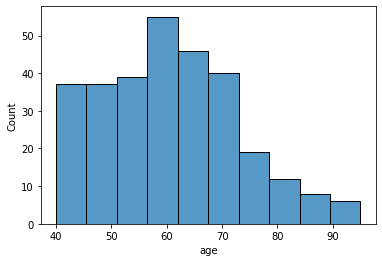

In [5]:
# membuat ploting umur dari pasien

sns.histplot(data=data, x="age")

diketahui bahwa pasien didominasi oleh individu dengan umur sekitar 60

In [100]:
data[data['DEATH_EVENT'] == 1][['age']].describe()

,age
count,96.000000
mean,65.215281
std,13.214556
min,42.000000
25%,55.000000
50%,65.000000
75%,75.000000
max,95.000000


In [101]:
data[data['DEATH_EVENT'] == 0][['age']].describe()

,age
count,203.000000
mean,58.761906
std,10.637890
min,40.000000
25%,50.000000
50%,60.000000
75%,65.000000
max,90.000000


berdasarkan tabel diatas ini, umur tidak bisa dikatakan berpengaruh banyak terhadap D.E karena ketika D.E 0 dan 1 memiliki rerata umur yang tidak jauh berbeda. Bahkan nilai minimal untuk D.E 1 adalah 42 dan untuk D.E 0 adalah 40, dimana aperbedaan ini sangat kecil dan tidak dapat menyimpulkan age ini berpengaruh banyak terhadap D.E

### EDA (2)

<AxesSubplot:xlabel='sex', ylabel='count'>

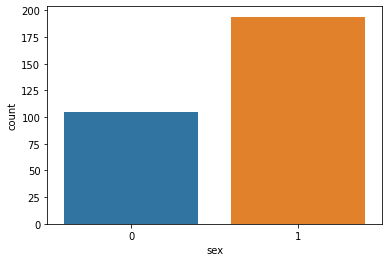

In [7]:
# membuat ploting gender dari pasien

sns.countplot(data=data, x = 'sex')

diketahui bahwa pasien yang paling banyak merupakan gender laki-laki

### EDA (3)

In [8]:
# melihat kolom smoking dengan death event

data.groupby(['DEATH_EVENT','smoking']).count()[['ID']]

ID
DEATH_EVENT smoking     
0           0        137
            1         66
1           0         66
            1         30

berdasarkan data diatas, dapat dikatakan bahwa smoking ini bukan menjadi penyebab utama terjadinya kematian pasien karena jumlah pasien perokok yang tiada ada 30 sedangkan untuk pasien bukan perokok dan telah tiada ada 66 yang mana lebih besar nilainya. jika asumsi rokok ini penyebabnya, seharusnya pasien perokok yang telah tiada lebih banyak jumlahnya.

### EDA (4)

In [9]:
# melihat kolom diabetes dengan death event

data.groupby(['DEATH_EVENT','diabetes']).count()[['ID']]

ID
DEATH_EVENT diabetes     
0           0         118
            1          85
1           0          56
            1          40

berdasarkan data diatas pun terlihat bahwa diabetes ini bukan menjadi penyebab utamanya karena dapat dilihat pasien yang telah tiada dan terkena diabetes serta yang tidak terkena diabetes nilainya hampir sama sehingga tidak dapat disimpulkan diabetes ini menjadi pengaruh utamanya.

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

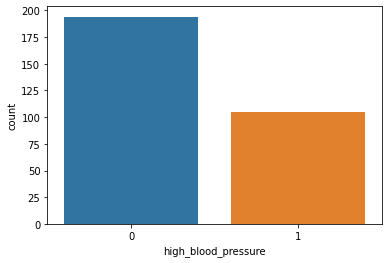

In [10]:
# membuat ploting tekanan darah tinggi dari pasien

sns.countplot(data=data, x="high_blood_pressure")

ternyata pasien yang mengalami tekanan darah tinggi lebih sedikit jumlahnya dari yang tekanan darah normal

### EDA (5)

<AxesSubplot:>

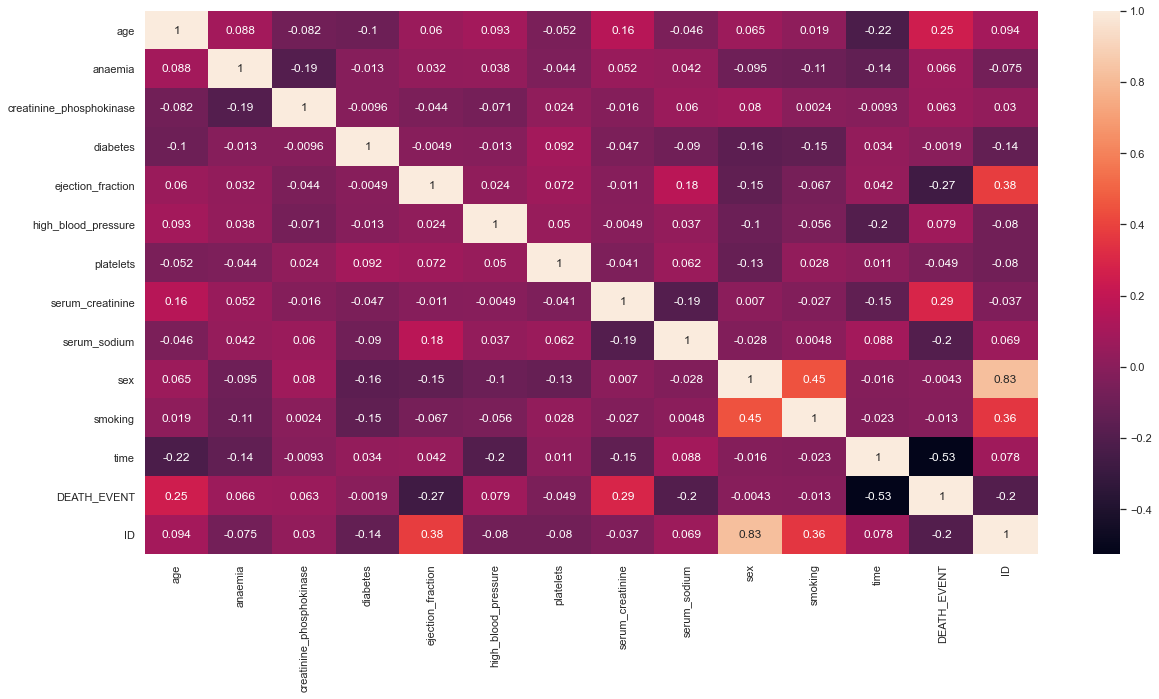

In [11]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(data.corr(),annot=True)

Heatmap diatas menunjukkan korelasi antara kolom data. Dari heatmap dapat diketahui kolom mana yang berkorelasi dengan D.E seperti serum_creatinine ini memiliki korelasi sebesar 0.29 dengan D.E

In [80]:
data[data['DEATH_EVENT'] == 1][['serum_creatinine']].describe()

,serum_creatinine
count,96.000000
mean,1.835833
std,1.468562
min,0.600000
25%,1.075000
50%,1.300000
75%,1.900000
max,9.400000


In [81]:
data[data['DEATH_EVENT'] == 0][['serum_creatinine']].describe()

,serum_creatinine
count,203.000000
mean,1.184877
std,0.654083
min,0.500000
25%,0.900000
50%,1.000000
75%,1.200000
max,6.100000


jika dibandingkan serum_creatinine antara yg D.E 0 dan 1 ini reratanya cukup berbeda jauh yaitu 1.18 dan 1.83. kemudian untuk nilai max dari keduanya pun beerbeda jauh yaitu 6.1 dan 9.4. maka dari itu, bisa jadi serum creatinine ini berkorelasi dimana ketika serum creatinine dalam darah tinggi maka kemungkina D.E terjadi juga lebih besar.

In [82]:
data[data['DEATH_EVENT'] == 1][['serum_sodium']].describe()

,serum_sodium
count,96.000000
mean,135.375000
std,5.001579
min,116.000000
25%,133.000000
50%,135.500000
75%,138.250000
max,146.000000


In [83]:
data[data['DEATH_EVENT'] == 0][['serum_sodium']].describe()

,serum_sodium
count,203.000000
mean,137.216749
std,3.982923
min,113.000000
25%,135.500000
50%,137.000000
75%,140.000000
max,148.000000


Untuk serum sodium ini tidak ada perbedaan yang cukup signifikan antara D.E 0 dan juga 1.

kita coba lihat berdasarkan plot

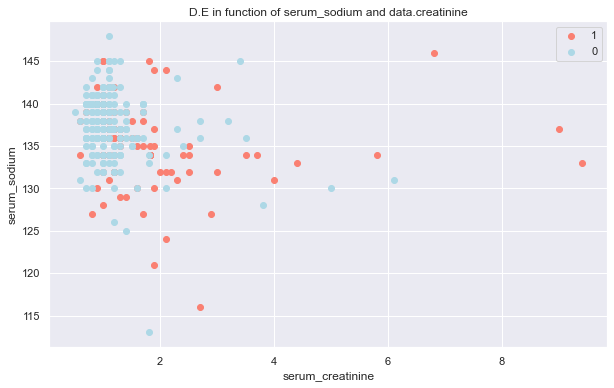

In [88]:
# mnelakukan plotting D.E dengan serum creatinine dan serum sodium
plt.figure(figsize=(10,6))


plt.scatter(data.serum_creatinine[data.DEATH_EVENT==1], 
            data.serum_sodium[data.DEATH_EVENT==1], 
            c="salmon") 


plt.scatter(data.serum_creatinine[data.DEATH_EVENT==0], 
            data.serum_sodium[data.DEATH_EVENT==0], 
            c="lightblue")


plt.title("D.E in function of serum_sodium and data.creatinine")
plt.xlabel("serum_creatinine")
plt.legend(["1", "0"])
plt.ylabel("serum_sodium");

Dari gambar ploting terlihat bnagaimana pengaruh dari serum sodium dan serum creatinine terhadap D.E. untuk serum creatinine, ketika nilainya tinggi, maka lebih didominasi D.E 1. Untuk serum sodium, lebih merata sehingga belum dapat disimpulkan apakah serum sodium berpengaruh kepada D.E

## DATA PREPROCESSING

In [12]:
# copy data
datacopy = data.copy()

In [13]:
# drop kolom ID
datacopy.drop(columns= 'ID', inplace= True)


In [14]:
# rename kolom target
datacopy.rename(columns={"DEATH_EVENT":"D.E"},inplace= True)

datacopy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,D.E
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [15]:
# cek info data
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  D.E                       299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


dari tabel diatas diketahui bahwa tidak ada missing values

## DATA INFERENCE

In [16]:
# membuat data inference
data_inf = datacopy.sample(10, random_state=24)
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,D.E
179,45.000,1,1876,1,35,0,226000.0,0.90,138,1,0,88,0
196,70.000,0,93,0,35,0,185000.0,1.10,134,1,1,208,0
108,75.000,0,582,0,20,1,265000.0,1.90,130,1,0,4,1
65,60.667,1,151,1,40,1,201000.0,1.00,136,0,0,172,0
183,81.000,0,4540,0,35,0,231000.0,1.18,137,1,1,107,0
29,62.000,0,281,1,35,0,221000.0,1.00,136,0,0,108,0
51,45.000,0,582,1,38,0,302000.0,0.90,140,0,0,244,0
3,53.000,1,91,0,20,1,418000.0,1.40,139,0,0,43,1
25,60.000,0,166,0,30,0,62000.0,1.70,127,0,0,207,1
82,50.000,0,582,0,50,0,153000.0,0.60,134,0,0,172,1


In [17]:
# menghilangkan data inference pada data secara keseluruhan

data_train_test= datacopy.drop(data_inf.index)
data_train_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,D.E
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.00,1.0,140,0,0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [18]:
# reset index

data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace = True)

## SPLITTING DATASET

In [19]:
# split between X dan y

X = data_train_test.drop(['D.E'], axis = 1)
y= data_train_test['D.E']

In [20]:
# split train-set and test-set


X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state=24)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (245, 12)
test size: (44, 12)


## HANDLING OUTLIER

In [21]:
# cek distribusi datanya

# Function to create histogram and boxplot.

def cek_distribusi(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

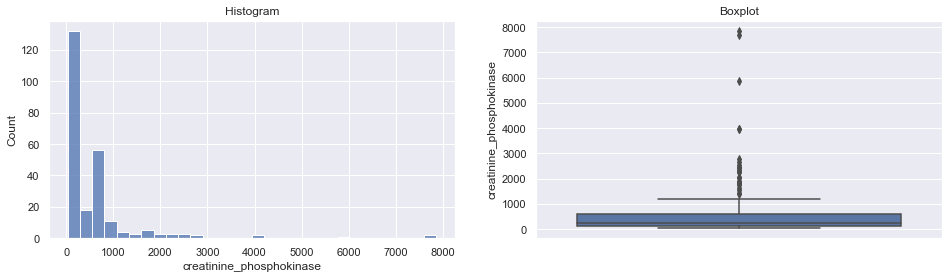

In [22]:
cek_distribusi(X_train,'creatinine_phosphokinase')

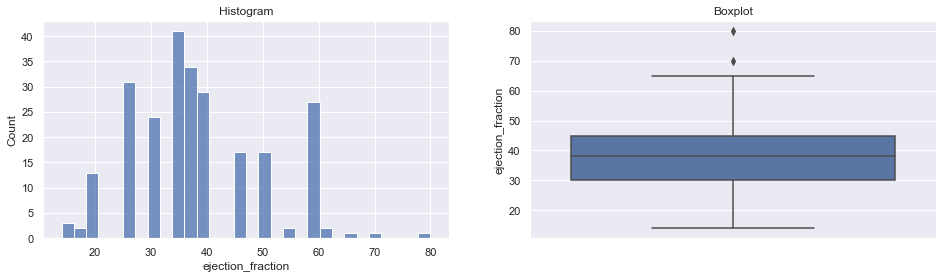

In [23]:
cek_distribusi(X_train,'ejection_fraction')

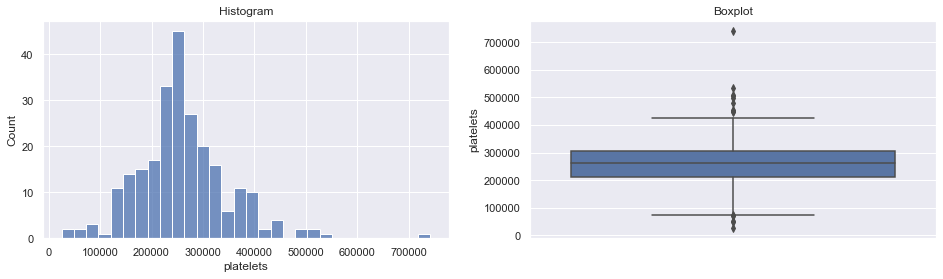

In [24]:
cek_distribusi(X_train,'platelets')

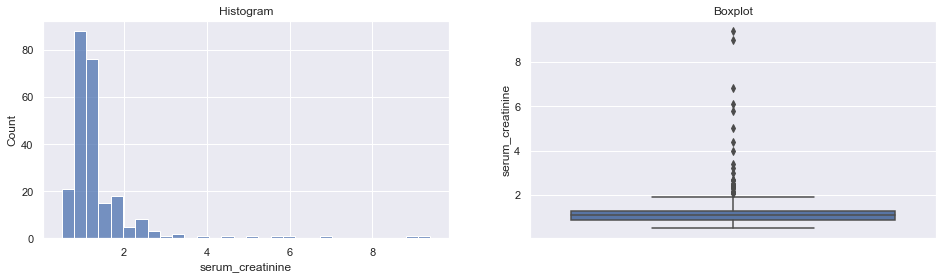

In [25]:
cek_distribusi(X_train,'serum_creatinine')

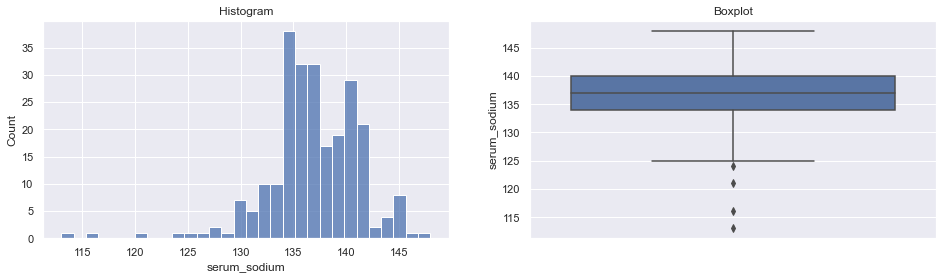

In [26]:
# cek distribusi dan outlier serum_sodium

cek_distribusi(X_train,'serum_sodium')

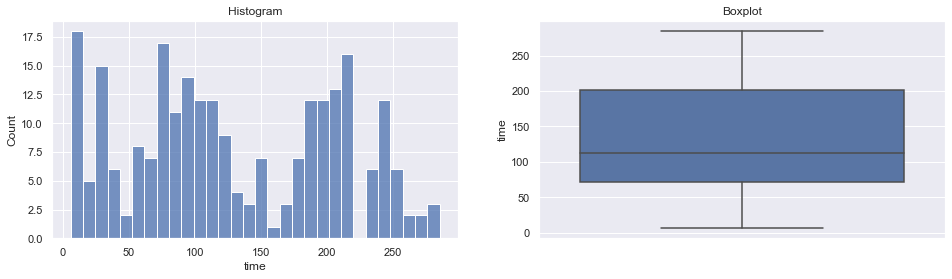

In [27]:
# cek distribusi dan outlier time

cek_distribusi(X_train,'time')

Berdasarkan gambar diatas kita dapat mengetahui bagaimana persebaran data berdasarkan fitur yang ingin kita handling outliernya. dari 6 fitur diatas, hanya data time saja yang tidak memiliki outlier karena tidak terdapat data dibagian atas maupun bawah dari boxplotnya.

Untuk kolom selain 6 yang telah dicek, tidak akan dilakukan handling outlier karena masih dirasa wajar nilai tersebut.

In [28]:
# cek skewness data
datacopy.skew()

age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
D.E                         0.770349
dtype: float64

Berdasarkan data diatas, data yang dianggap skew atau tidak terdistribusi secara normal ialah yang memiliki nilai kurang dari -0.5 da diatas 0.5. misal pada kolom age nilainya 0.42 berarti data tersebut terdistribusi normal.

kemudian data tersebut akan dicapping untuk menghindari kehilangan data yang banyak jika ditrimming. untuk capping ini akan digunakan winsorizer

In [29]:
# Create the capper

wins = Winsorizer(capping_method='iqr', 
                          tail='both',
                          fold=1.5,
                          variables=['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'])

wins.fit(X_train)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['creatinine_phosphokinase', 'ejection_fraction',
                      'platelets', 'serum_creatinine', 'serum_sodium'])

In [30]:
X_train = wins.transform(X_train)

## FEATURE SCALING

In [31]:
# cek skewness data
X_train.skew()

age                         0.384150
anaemia                     0.206418
creatinine_phosphokinase    1.047915
diabetes                    0.341576
ejection_fraction           0.452111
high_blood_pressure         0.609315
platelets                   0.186371
serum_creatinine            0.718989
serum_sodium               -0.338751
sex                        -0.666208
smoking                     0.825666
time                        0.131196
dtype: float64

untuk kolom yang akan discaling ialah kolom age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, dan time. untuk liannya tidak discaling karena merupakan data numerik yang sifatnya kategorik sehingga tidak perlu discaling seperti pada gender 0 dan 1 merupakan keterangan mana yang male dan female.

Scaler yang digunakan pada kasus ini ialah minmaxscaler karena ada data yang masih tidak normal walaupun telah dinormalisasi.

In [32]:
# memisahkan data yang tidak discaling

X_train_scale = X_train[['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']]
X_train_notscale = X_train[['anaemia','diabetes','high_blood_pressure','sex','smoking']]

X_test_scale = X_test[['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']]
X_test_notscale = X_test[['anaemia','diabetes','high_blood_pressure','sex','smoking']]

In [33]:
# feature scaling
scaler = MinMaxScaler()

# lakukan fit scaling untuk tiap data
scaler.fit(X_train_scale)

# lakukan transform scaling untuk tiap data yg skew dan normal
X_train_scaled = scaler.transform(X_train_scale)

X_test_scaled = scaler.transform(X_test_scale)

In [34]:
#concat data

X_train_final = np.concatenate([X_train_scaled, X_train_notscale], axis = 1)
X_test_final = np.concatenate([X_test_scaled, X_test_notscale], axis =1)

In [35]:
X_test_final.shape

(44, 12)

## MODEL DEFINITION

Kali ini akan dicoba pemodelan menggunakan randomforestclassifier serta mengimplementasikan boosting didalam pemodeelannya.

In [36]:
model_RF = RandomForestClassifier()
model_ada = AdaBoostClassifier(learning_rate=0.1, random_state=24)

## MODEL TRAINING

In [37]:
model_RF.fit(X_train_final,y_train)
model_ada.fit(X_train_final,y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=24)

## MODEL EVALUATION

### eval randomforest

In [38]:
y_pred_test = model_RF.predict (X_test_final)

In [41]:
# cek akurasi skor
print(f" akurasi score terhadap data test: {accuracy_score(y_test,y_pred_test)}")

 akurasi score terhadap data test: 0.9090909090909091


In [42]:
# cek report terhadap test data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.90      0.75      0.82        12

    accuracy                           0.91        44
   macro avg       0.91      0.86      0.88        44
weighted avg       0.91      0.91      0.91        44



<AxesSubplot:>

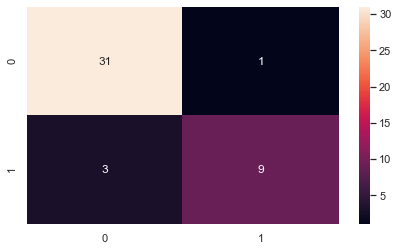

In [52]:
# eval denga confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

sns.set(rc={'figure.figsize':(7,4)})
sns.heatmap(cm, annot=True)

hasil evaluasi model randomforest ini mendapatkan akurasi skor 0.90 dimana nilai ini sangat bagus karena mendekati angka 1.

berdasarkan classification report, untuk precision nilainya 0,9 yang merupakan rasio TP terhadap semua hasil positif sehingga ada kemungkinan 0,1 merupakan FP. berdasarkan nilai recallnya, untuk target 0 ini mendapatkan hasil yang baik yaitu 0.97 sehingga kemungkinan terjadi FN hanya 0.03 namun untuk target 1 nilai 0.75 sehingga masih ada kemungkinan 25% terjadi FN. sampel yang tidak balance ini mungkin menjadi penyebab mengapa nilai untuk target 0 dan 1 berbeda

dilihat dari confusion matrixnya, terdapat 3 sampel yg FN dan 1 sampel yg FP. pada kasus ini akan lebih bahaya jika terdeteksi FP karena pasien yg dianggap sakit tapi tidak terdeteksi sakit.

### eval adaboost

In [53]:
y_pred_test_ada = model_ada.predict (X_test_final)

In [54]:
# cek akurasi skor
print(f" akurasi score terhadap data test: {accuracy_score(y_test,y_pred_test_ada)}")

 akurasi score terhadap data test: 0.8863636363636364


In [55]:
# cek report terhadap test data
print(classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.82      0.75      0.78        12

    accuracy                           0.89        44
   macro avg       0.86      0.84      0.85        44
weighted avg       0.88      0.89      0.88        44



<AxesSubplot:>

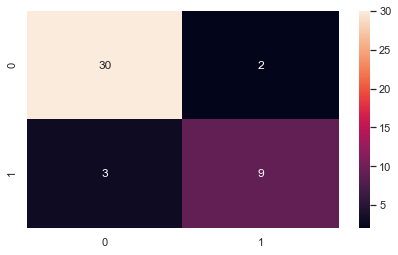

In [56]:
# eval denga confusion matrix
cm = confusion_matrix(y_test, y_pred_test_ada)

sns.set(rc={'figure.figsize':(7,4)})
sns.heatmap(cm, annot=True)

dengan adaboost ini model yang dihasilkan tidak lebih baik daripada randomforest. dari akurasi skornya, untuk adaboost mendapatkan skor lebih rendah daripada randomforest. berdasarkan classification reportnya, ada peningkatan untuk precisionnya namun untuk recall ada sedikit penurunan. pada jenis kasus ini, FN tentunya lebih berbahaya, dengan recall yang nilainya turun maka ada kemungkinan lebih besar memprediksi FN.

jika dilihat dari confusion matrix pun ada penurunan. ketika nilai FN ini inngin dibuat 0, justru model ini lebih banyak menghasilkan FN daripada randomforest

## HYPERPARAMETER

Ingin dicoba model terbaik yaitu randomforest apakah bisa ditingkatkan kembali dengan tuning hyperparameter

In [59]:
# definikan parameter yang akan dicoba pada randomforest
md = range(1,31)
param_grid = {"criterion": ["gini","entropy"],
              "n_estimators" :[10,20,30,40,50,70,90,100],
              "max_depth": md
              }

grid_cv = GridSearchCV(model_RF, param_grid, cv=5)

# fit parameter kedalam data
grid_cv.fit(X_train_final,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'n_estimators': [10, 20, 30, 40, 50, 70, 90, 100]})

In [60]:
# print hasil untuk best score
print("Best Score untuk model randomforest:{}".format(grid_cv.best_score_))
print("Best Hyperparameters untuk randomforest:\n{}".format(grid_cv.best_params_))

Best Score untuk model randomforest:0.8448979591836736
Best Hyperparameters untuk randomforest:
{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 10}


Hasilnya lebih rendah dari sebelumnya. kita gunakan model yg awal dengan score 0.9

## MODEL INFERENCE

In [67]:
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,D.E
0,45.000,1,1876,1,35,0,226000.0,0.90,138,1,0,88,0
1,70.000,0,93,0,35,0,185000.0,1.10,134,1,1,208,0
2,75.000,0,582,0,20,1,265000.0,1.90,130,1,0,4,1
3,60.667,1,151,1,40,1,201000.0,1.00,136,0,0,172,0
4,81.000,0,4540,0,35,0,231000.0,1.18,137,1,1,107,0
5,62.000,0,281,1,35,0,221000.0,1.00,136,0,0,108,0
6,45.000,0,582,1,38,0,302000.0,0.90,140,0,0,244,0
7,53.000,1,91,0,20,1,418000.0,1.40,139,0,0,43,1
8,60.000,0,166,0,30,0,62000.0,1.70,127,0,0,207,1
9,50.000,0,582,0,50,0,153000.0,0.60,134,0,0,172,1


In [71]:
# feature scaling 
data_inf_scale = data_inf[['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']]
data_inf_notscale = data_inf[['anaemia','diabetes','high_blood_pressure','sex','smoking']]

scaler = MinMaxScaler()

# lakukan fit scaling untuk tiap data
scaler.fit(X_train_scale)

# lakukan transform scaling untuk tiap data
data_inf_scaled = scaler.transform(data_inf_scale)

data_inf_final = np.concatenate([data_inf_scaled, data_inf_notscale], axis = 1)

In [72]:
data_inf_final.shape

(10, 12)

In [73]:
# predict data inference

y_pred_inf = model_RF.predict(data_inf_final)

In [74]:
# konversi data kedalam dataframe

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns = ['D.E Prediction'])

In [75]:
# concat data sebelumnya dengaan data aslinya

pd.concat([data_inf['D.E'],y_pred_inf_df], axis = 1)

,D.E,D.E Prediction
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,0
9,1,0


## KESIMPULAN

Berdasarkan objektif yaitu membuat pemodelan prediksi D.E dari suatu pasien antara randomforest dan adaboost, model randomforest merupakan model yang paling baik digunakan dengan akurasi skor 0.9. Dari cllasification report diketahui bahwa tingkat precision yang dihasilkan model randomforest adalah 0.9 yang artinya kemungkinan Fp hanya 0.1 sedangkan dari nilai recall yang didapat ialah 0.97 dan 0.75 artinya ada kemungkina 0.03 dan 0.25 terjadi FN. Berdasarkan confusion matrixnya, ada kemungkinan 1 sampel FP dan 3 sampe FN. sedangkan dari hasil prediksi data infertencenya, berhasil menebak 8 data dengan benar dan masih ada prediksi yang sifatnya FN dimana sangat bahaya.

## CONCEPTUAL PROBLEMS

1. Apakah yang dimaksud dengan Bagging?

    Bagging, juga dikenal sebagai agregasi bootstrap, adalah metode ensemble yang biasa digunakan untuk mengurangi varians dalam dataset yang noise. Dalam bagging, sampel data acak dalam train set dipilih dengan replacemnet, artinya titik data individual dapat dipilih lebih dari sekali. Setelah beberapa sampel data dihasilkan, model yang lemah ini kemudian dilatih secara independen, dan bergantung pada jenis regresi atau klasifikasi, rata-rata atau sebagian besar prediksi tersebut menghasilkan perkiraan yang lebih akurat.

2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

    randomforest adalah algoritma digunakan yang menggabungkan output dari beberapa decision tree untuk mencapai satu hasil. metode ini menangani masalah klasifikasi dan regresi karena menggabungkan kesederhanaan decision tree dengan fleksibilitas yang mengarah pada peningkatan akurasi yang signifikan.
    
    adaboost adalah metode Boosting yang digunakan sebagai Ensemble Machine Learning System. Bobot setiap pohon didistribusikan kembali di setiap putaran, dengan bobot yang lebih tinggi diberikan pada kondisi yang salah diklasifikasikan, oleh karena itu metode ini disebut Peningkatan Adaptif. AdaBoost menggunakan beberapa single-level decision-making trees yang disebut forest of trees.